In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spam_raw=pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
#using encoding latin-1 to ignore the decoding error

DATA CLEANING



In [3]:
#1.check info
#2.check shape
#3.check null
#4.check duplicate
#5.remove unnecessary columns

In [4]:
spam_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
spam_raw.shape

(5572, 5)

In [6]:
sp2 = spam_raw.loc[spam_raw['Unnamed: 3'].notnull()]
sp2.shape

(12, 5)

In [7]:
#the 3,4,5 columns are not needed hence dropping them
spam_raw=spam_raw.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [8]:
spam_raw.sample(5)

,v1,v2
5244,ham,thanks for the temales it was wonderful. Thank...
4862,spam,Bored housewives! Chat n date now! 0871750.77....
524,spam,"URGENT!: Your Mobile No. was awarded a å£2,000..."
1782,ham,My uncles in Atlanta. Wish you guys a great se...
4563,ham,Tell me again what your address is


In [9]:
#change the labels into something descriptive
spam_raw.rename(columns={'v1':'target','v2':'text'},inplace=True)



In [10]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [11]:
#encode the spam and ham into numbers
spam_raw['target']=encode.fit_transform(spam_raw['target'])
spam_raw.head(4)
#0 for ham
#1 for spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [12]:
spam_raw.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
spam_raw.duplicated().sum()

403

In [14]:
#removing the duplicates while keeping only the first copy
spam_raw=spam_raw.drop_duplicates(keep='first')
#because this is a classification problem and duplicated spam messages will always be classified as spam

In [15]:
spam_raw.shape

(5169, 2)

EDA

Text(0.5, 1.0, 'Distribution of Spam and Ham')

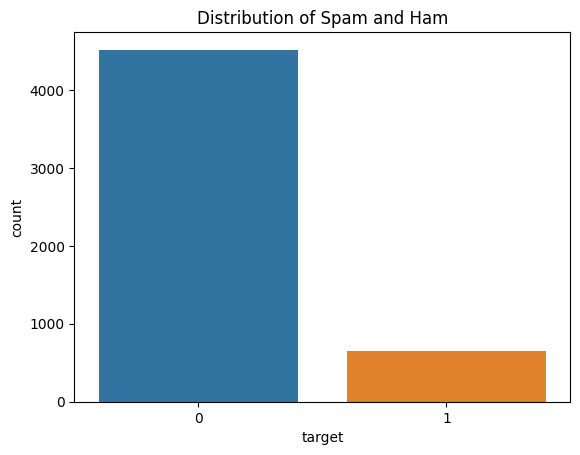

In [16]:
#count the amount of ham and spam
sns.countplot(x = "target", data = spam_raw)
spam_raw.loc[:, 'target'].value_counts()
plt.title('Distribution of Spam and Ham')

the data is unbalanced

In [17]:
#1.
#2.remove punctuation stop words and stem the words

#3.find the number of characters and length
#4.find the correlation between them

In [18]:
import nltk


In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
spam_raw['charac']=spam_raw['text'].apply(len)
spam_raw['words']=spam_raw['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
spam_raw.sample(2)

,target,text,charac,words
1776,1,Call FREEPHONE 0800 542 0578 now!,33,7
989,0,Ugh. Gotta drive back to sd from la. My butt i...,53,16


In [22]:
#find the stats of ham 
spam_raw[spam_raw['target']==0][['charac','words']].describe()

,charac,words
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [23]:
#find the stats of spam 
spam_raw[spam_raw['target']==1][['charac','words']].describe()

,charac,words
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


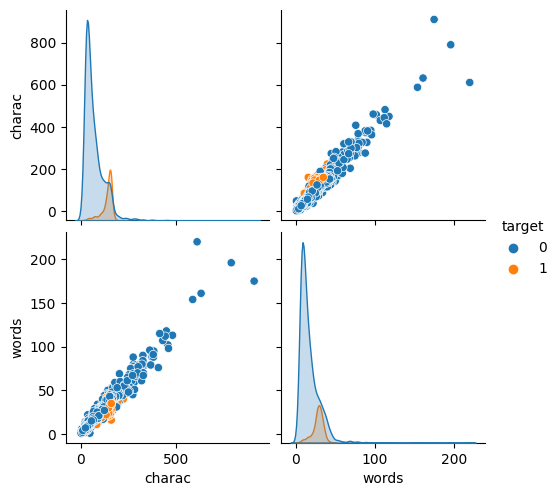

In [24]:
# data analysis visualisation
#1.pairplot between charac and words
#2.heatmap between their correlations
#3.if strongly correlated then use the better column only
sns.pairplot(spam_raw,hue='target')

C:\Users\ANANYA\AppData\Local\Temp\ipykernel_3316\3673841065.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam_raw.corr(),annot=True)


<Axes: >

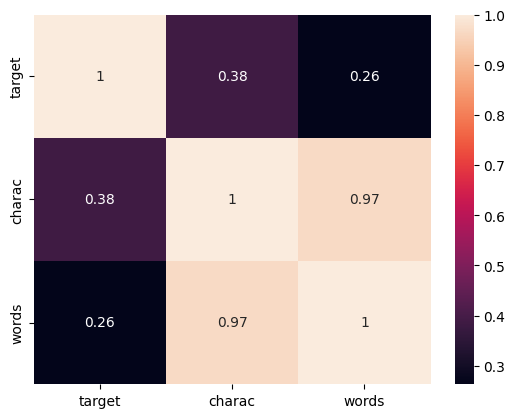

In [25]:
sns.heatmap(spam_raw.corr(),annot=True)

In [26]:
#character and words have a very high correlation
#character has more correlation with target


DATA PREPROCESSING

In [27]:
#remove stop words
#to lowercase
#remove punctuation and special characters
#stemming

In [28]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [29]:


def transtext(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    stop_words = set(stopwords.words('english'))

    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [30]:
#checking for the function
transtext("I'm gonna be home soon and i don't want &**& .?>< to talk about ")

'gon na home soon want talk'

In [31]:
spam_raw['modtext']=spam_raw['text'].apply(transtext)
spam_raw.head(2)

,target,text,charac,words,modtext
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni


In [32]:
#lets find the most frequent 50 words for ham and spam
#

In [33]:
spam_corpus = []
for msg in spam_raw[spam_raw['target'] == 1]['modtext'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [34]:
len(spam_corpus)

9939

In [35]:
#text vectorisation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=2000)

In [36]:
X=tf.fit_transform(spam_raw['modtext']).toarray()

In [37]:
X.shape

(5169, 2000)

In [38]:
y=spam_raw['target'].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [42]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [43]:
gnb.fit(xtrain,ytrain)
y_pred1 = gnb.predict(xtest)
print(accuracy_score(ytest,y_pred1))
print(confusion_matrix(ytest,y_pred1))
print(precision_score(ytest,y_pred1))

0.851063829787234
[[765 131]
 [ 23 115]]
0.46747967479674796


In [44]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [45]:
l.fit(xtrain,ytrain)
ypred=l.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(precision_score(ytest,ypred))

0.9593810444874274
[[893   3]
 [ 39  99]]
0.9705882352941176
